<a href="https://colab.research.google.com/github/ghisford/Machine_learning/blob/main/Swahili_News_Classification_by_Clan_members_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's install PyTorch and fastai libraries first. You have to repeat this step every time you restart this notebook in colab.

In [ ]:
!pip install torch torchvision
!pip install fastai

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# import libraries
import torch
import fastai
from fastai.text.all import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os
from sklearn.model_selection import train_test_split

In [ ]:
fastai.__version__

'2.7.15'

In [ ]:
#data to be used
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")
ss = pd.read_csv("/content/SampleSubmission.csv")


In [ ]:
train.head(5)

,id,content,category
0,SW0,"SERIKALI imesema haitakuwa tayari kuona amani na utulivu wa nchi inachezewa huku ikisisitiza uwepo wa umoja kati ya wananchi bila kujali tofauti ya imani, kabila au itikadi yoyote.Hayo yalisemwa na Naibu Waziri wa Mambo ya Ndani ya Nchi, Hamad Yussuf Masauni wakati akifungua semina ya siku mbili iliyofanyika jijini Dar es Salaam ikiwahusisha viongozi wa taasisi za Kiislamu, lengo ikiwa ni kuwakumbusha kuhubiri amani katika sehemu zao.Naibu Waziri amesema mwelekeo na malengo ya Serikali ya Awamu ya Tano ni kukuza maendeleo katika sehemu mbalimbali nchini lengo ikiwa kuinua maisha ya wananc...",Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya Jukwaa la Fursa za Biashara la mkoa huo.Mwanri ameagiza kuwa, hata kama kuna likizo zimeidhinishwa zifutwe.Amemuagiza Katibu Tawala wa Mkoa huo, Msalika Makungu kuandika barua kwa viongozi kuhusu uamuzi huo na amebainisha kuwa hakushauriwa na mtu, kaamua yeye.“Anayebisha anyooshe mkono, ajifanye angalau anajikuna tu” amesema Mwanri kwenye jukwaa hilo la nane lililomalizika leo.Amewaeleza viongozi wa Tabora kuwa, mambo waliyopanga kuyafanya wakati wa likizo nje ya Tabora wanaweza kuy...",Biashara
2,SW10,"SERIKALI imetoa miezi sita kwa taasisi zote za umma ambazo hazitumii mfumo wa GePG katika ukusanyaji wa fedha kufanya hivyo na baada ya hapo itafanya ukaguzi na kuwawajibisha maofi sa masuhuli walioshindwa kutekeleza hilo.Akifungua mkutano wa mwaka wa kwanza wa watumiaji wa mfumo huo jana jijini hapa, Naibu Katibu Mkuu Wizara ya Fedha na Mipango, Dk Hartibu Kazungu alisema ukaguzi huo ambao utaanza kufanyika Juni mwakani baada ya kipindi kilichowekwa kupita ili kuwabaini maofisa wazembe.Alisema, wizara yake itafanya ukaguzi wa ofisi zote za umma ili kubaini kama kuna fedha zinazokusanywa ...",Kitaifa
3,SW100,"KAMPUNI ya mchezo wa kubahatisha ya M-bet imeingia makubaliano ya udhamini na timu ya soka ya Manispaa ya Kinondoni (KMC) kwa miaka mitano wenye thamani ya sh Bilioni 1.Akizungumzia udhamini huo jana baada ya kusaini mkataba huo, Meneja Masoko wa Mbet, Allen Mushi alisema sababu ya kuiunga mkono timu hiyo ni baada ya kuvutiwa na kiwango bora walichokionesha timu hiyo tangu msimu uliopita. Alisema kitendo cha kumaliza ligi katika nafasi ya nne bora sio cha mchezo na kwamba hata wanapokuwa uwanjani hucheza soka la kuvutia tofauti na wengine.“Tumeichagua KMC kwasababu tumevutiwa na mambo men...",michezo
4,SW1000,"WATANZANIA wamekumbushwa kusherehekea sikukuu ya Krismasi kwa kuenzi amani, umoja na kulinda tamaduni za nchi ili kupambana na changamoto mbalimbali zinazojitokeza, ikiwemo vitendo vya ushoga na matumizi ya dawa za kulevya.Akizungumza wakati wa kutoa heri ya sikukuu hiyo ya Kuzaliwa Yesu Kristo, Kiongozi wa Waislamu wa madhehebu ya Shia Ithnasheriya, Shehe Hemed Jalala alisema kuzaliwa kwa Yesu kunalenga kuhubiri na kutangaza amani ulimwenguni. Shehe Jalala alisema licha ya Wayahudi kutilia shaka kuzaliwa kwa Yesu, lakini pindi alipozaliwa alitangaza amani kwake na duniani kote akitaka ki...",Kitaifa


### Data Preparation

In [ ]:
n_labels = len(train["category"].unique())
n_labels

5

In [ ]:
df_trn, df_val = train_test_split(train, stratify = train['category'], test_size=0.3, random_state=123)
df_trn.shape, df_val.shape

((3605, 3), (1546, 3))

In [ ]:
df_lm = pd.concat([df_trn, df_val], axis=0)[['content']]
df_lm.head()

,content
167,"Hayo yalisema juzi na Waziri wa Viwanda na Biashara, Dk Abdallah Kigoda wakati akifungua kikao cha kazi kilichofanyika Dar es Salaam na kuwashirikisha viongozi wa wizara na wakuu wa taasisi zake.Alisema katika kipindi cha mwaka juzi, sekta hiyo ilikua kwa asilimia 8.2, ikilinganishwa na asilimia 7.8 mwaka 2011. Pia, mchango wa sekta hiyo katika pato la taifa, uliongezeka kutoka asilimia 9.7 mwaka 2011 hadi 9.85 mwaka 2012/2013.Alisema mwaka juzi sekta ya viwanda vidogo na biashara ndogo, ilichangia asilimia 27.9 katika pato la taifa na kuajiri watu milioni 5.2 wanaofanyakazi katika jasili..."
3863,"['Muogeleaji wa Italia Filippo Magnini amemuokoa Anrea Benedetto ambaye alikuwa akizama kwenye maji siku ya Jumapili.', 'Bingwa wa zamani wa michuano ya kuogelea alijitosa majini baada ya marafiki wa mwanaume huyo kuanza kupiga kelele katika ufukwe wa Cala Sinzias.', 'Magnini aliunyanyua uso wa Benedetto juu ya maji mpaka wahudumu waokoaji walipowasili.', ""''Nilianya nilichotakiwa kufanya,'' mwanamichezo huyo mstaafu alisema."", 'Ni siku mbili pekee kabla, bwana Benedetto, 45, alikua amefunga ndoa na mpenzi wake wa jinsia moja.', 'Tukio hilo la Jumapili lilishuhudiwa na rafiki wa wapenzi ha..."
914,"UONGOZI wa timu ya soka ya Yanga umesema hauna mpango wa kubadilisha kikosi chake katika mchezo wao na Azam FC ambao utachezwa leo usiku kuanzia saa 2:15 wa Kombe la Mapinduzi Timu hizo zinakutana leo katika dimba la Amaan, Azam inashuka ikiwa na pointi moja baada ya mchezo wake wa kwanza kutoka sare na Jamhuri na Yanga wana pointi tatu kufuatia kushinda katika mchezo wake wa juzi na timu ya KVZ na kuongoza Kundi A, ambalo linaundwa na timu hizo.Kauli hiyo imetolewa na Meneja wa timu hiyo, Nadir Haroub Cannavaro alipozungumza na waandishi wa habari mara baada ya mchezo huo dhidi ya KVZ na..."
158,"HALI ya uzazi wa mpango nchini bado iko nyuma, jambo ambalo linahitaji kuwekewa nguvu kubwa, imeelezwa. Akizungumza katika mkutano uliozikutanisha asasi za kiraia, Mkurugenzi wa Miradi wa Taasisi ya Afya Tanzania, Salvatory Hokororo alisema jamii bado haina elimu ya kutosha.“Kulingana na takwimu za Wizara ya Afya, Maendeleo ya Jamii, Jinsia, Wazee na Watoto, tuna asilimia 32 na tungependa kufikia asilimia 60, kwa hiyo kwa takwimu hizi ina maana kwamba bado tuko chini sana,” alisema.Alisema elimu ya uzazi wa mpango haijapewa msukumo mkubwa ndio maana haijasambaa kwa kiasi kikubwa. “Naona h..."
5122,"Katika mchezo wa kwanza, Yanga wakiwa nyumbani walipata ushindi mwembamba wa bao 1-0, hivyo katika mchezo huo wawakilishi hao wa Tanzania Bara, wanahitaji sare au ushindi wa namna yoyote ili kusonga mbele hatua inayofuata.Akizungumza na gazeti hili kabla ya timu kuondoka, msemaji wa Yanga Dismas Ten, alisema wamekwenda Shelisheli wakiwa na uhakika na ushindi kutokana na maandalizi mazuri ambayo wameyafanya tangu mchezo wao wa mwisho wa ligi dhidi ya Majimaji.“Timu imefanya mazoezi ya kutosha na kocha ameridhishwa nayo, lakini pia wachezaji wote wapo fiti kiafya na kiakili kwa ajili ya pam..."


In [ ]:
# The datablock
dblock = DataBlock(
    blocks=TextBlock.from_df('content', is_lm=True),
    get_x=ColReader('text'),
    splitter=RandomSplitter(0.1))



In [ ]:
df_lm

,content
167,"Hayo yalisema juzi na Waziri wa Viwanda na Biashara, Dk Abdallah Kigoda wakati akifungua kikao cha kazi kilichofanyika Dar es Salaam na kuwashirikisha viongozi wa wizara na wakuu wa taasisi zake.Alisema katika kipindi cha mwaka juzi, sekta hiyo ilikua kwa asilimia 8.2, ikilinganishwa na asilimia 7.8 mwaka 2011. Pia, mchango wa sekta hiyo katika pato la taifa, uliongezeka kutoka asilimia 9.7 mwaka 2011 hadi 9.85 mwaka 2012/2013.Alisema mwaka juzi sekta ya viwanda vidogo na biashara ndogo, ilichangia asilimia 27.9 katika pato la taifa na kuajiri watu milioni 5.2 wanaofanyakazi katika jasili..."
3863,"['Muogeleaji wa Italia Filippo Magnini amemuokoa Anrea Benedetto ambaye alikuwa akizama kwenye maji siku ya Jumapili.', 'Bingwa wa zamani wa michuano ya kuogelea alijitosa majini baada ya marafiki wa mwanaume huyo kuanza kupiga kelele katika ufukwe wa Cala Sinzias.', 'Magnini aliunyanyua uso wa Benedetto juu ya maji mpaka wahudumu waokoaji walipowasili.', ""''Nilianya nilichotakiwa kufanya,'' mwanamichezo huyo mstaafu alisema."", 'Ni siku mbili pekee kabla, bwana Benedetto, 45, alikua amefunga ndoa na mpenzi wake wa jinsia moja.', 'Tukio hilo la Jumapili lilishuhudiwa na rafiki wa wapenzi ha..."
914,"UONGOZI wa timu ya soka ya Yanga umesema hauna mpango wa kubadilisha kikosi chake katika mchezo wao na Azam FC ambao utachezwa leo usiku kuanzia saa 2:15 wa Kombe la Mapinduzi Timu hizo zinakutana leo katika dimba la Amaan, Azam inashuka ikiwa na pointi moja baada ya mchezo wake wa kwanza kutoka sare na Jamhuri na Yanga wana pointi tatu kufuatia kushinda katika mchezo wake wa juzi na timu ya KVZ na kuongoza Kundi A, ambalo linaundwa na timu hizo.Kauli hiyo imetolewa na Meneja wa timu hiyo, Nadir Haroub Cannavaro alipozungumza na waandishi wa habari mara baada ya mchezo huo dhidi ya KVZ na..."
158,"HALI ya uzazi wa mpango nchini bado iko nyuma, jambo ambalo linahitaji kuwekewa nguvu kubwa, imeelezwa. Akizungumza katika mkutano uliozikutanisha asasi za kiraia, Mkurugenzi wa Miradi wa Taasisi ya Afya Tanzania, Salvatory Hokororo alisema jamii bado haina elimu ya kutosha.“Kulingana na takwimu za Wizara ya Afya, Maendeleo ya Jamii, Jinsia, Wazee na Watoto, tuna asilimia 32 na tungependa kufikia asilimia 60, kwa hiyo kwa takwimu hizi ina maana kwamba bado tuko chini sana,” alisema.Alisema elimu ya uzazi wa mpango haijapewa msukumo mkubwa ndio maana haijasambaa kwa kiasi kikubwa. “Naona h..."
5122,"Katika mchezo wa kwanza, Yanga wakiwa nyumbani walipata ushindi mwembamba wa bao 1-0, hivyo katika mchezo huo wawakilishi hao wa Tanzania Bara, wanahitaji sare au ushindi wa namna yoyote ili kusonga mbele hatua inayofuata.Akizungumza na gazeti hili kabla ya timu kuondoka, msemaji wa Yanga Dismas Ten, alisema wamekwenda Shelisheli wakiwa na uhakika na ushindi kutokana na maandalizi mazuri ambayo wameyafanya tangu mchezo wao wa mwisho wa ligi dhidi ya Majimaji.“Timu imefanya mazoezi ya kutosha na kocha ameridhishwa nayo, lakini pia wachezaji wote wapo fiti kiafya na kiakili kwa ajili ya pam..."
...,...
4535,"Katika taarifa ya Mwenyekiti wa CUF Taifa, Profesa Ibrahimu Lipumba, aliyoitoa kwa vyombo vya habari jana, amesema katika Bandari ya Dar es Salaam kuna wizi mkubwa wa makontena na vifaa vya magari kama vile taa na radio, uchakachuaji wa mafuta pamoja na urasimu wa kuchelewesha mzigo kutoka bandarini.Udhaifu mwingine aliouzungumzia ni ukubwa wa tozo za bandari na barabara, ugumu wa magari ya mizigo kufika na kutoka bandarini, taratibu zisizotabirika za kutoa mizigo na rushwa iliyokithiri miongoni mwa watendaji wa bandari na barabarani.Mwanasiasa huyo amekumbusha kuwa asilimia 90 ya biashar..."
4429,"Mechi iliyozikutanisha klabu za Simba na Yanga mwishoni mwa wiki iliyopita imeingiza jumla ya Shilingi milioni 342.8. huku Yanga iliyokuwa timu mwenyeji ikipata Sh. milioni 165.Taarifa fupi iliyotolewa na Shirikisho la Soka (TFF) leo Jumatatu kupitia ukurasa wake wa Instagram, imeeleza kuwa katika mchezo huo uliochezwa Jumamosi, wiki iliyo

In [ ]:
# Creating the dataloader.
dls = dblock.dataloaders(df_lm, bs=4)

In [ ]:
 dls.show_batch(max_n=2)

,text,text_
0,"xxbos [ ' mkufunzi wa xxmaj man xxmaj united xxmaj ole xxmaj gunnar xxmaj solskjaer anahofia kwamba hatma ya kazi yake itakuwa haijulikani iwapo timu yake itashindwa kwa mabao mengi ugenini xxunk ) ' , ' baadhi ya wachezaji wamepoteza matumaini na raia huyo wa xxmaj norway anaamini baadhi yao wamekataa kumsikiliza . ( sun ) ' , ' solskjaer anahitaji kitita cha £ 300 m kutumia katika dirisha lijalo la uhamisho","[ ' mkufunzi wa xxmaj man xxmaj united xxmaj ole xxmaj gunnar xxmaj solskjaer anahofia kwamba hatma ya kazi yake itakuwa haijulikani iwapo timu yake itashindwa kwa mabao mengi ugenini xxunk ) ' , ' baadhi ya wachezaji wamepoteza matumaini na raia huyo wa xxmaj norway anaamini baadhi yao wamekataa kumsikiliza . ( sun ) ' , ' solskjaer anahitaji kitita cha £ 300 m kutumia katika dirisha lijalo la uhamisho na"
1,"unga wa xxunk kauli hiyo xxmaj ikulu , xxmaj dar es xxmaj salaam jana wakati akishuhudia makabidhiano ya fedha taslimu xxmaj sh milioni 170 za xxmaj tanzania , xxmaj sh xxunk za xxmaj kenya na xxmaj dola za xxmaj marekani xxunk zilizoibwa na majambazi mwezi xxmaj mei mwaka 2004 baada ya kuvamia xxmaj benki ya xxup nbc xxmaj tawi la xxmaj moshi pamoja na kilogramu 35.34 za dhahabu xxunk kutoka xxmaj tanzania","wa xxunk kauli hiyo xxmaj ikulu , xxmaj dar es xxmaj salaam jana wakati akishuhudia makabidhiano ya fedha taslimu xxmaj sh milioni 170 za xxmaj tanzania , xxmaj sh xxunk za xxmaj kenya na xxmaj dola za xxmaj marekani xxunk zilizoibwa na majambazi mwezi xxmaj mei mwaka 2004 baada ya kuvamia xxmaj benki ya xxup nbc xxmaj tawi la xxmaj moshi pamoja na kilogramu 35.34 za dhahabu xxunk kutoka xxmaj tanzania na"


In [ ]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult=0.3, metrics=[accuracy]).to_fp16()

SuggestedLRs(valley=0.02290867641568184)

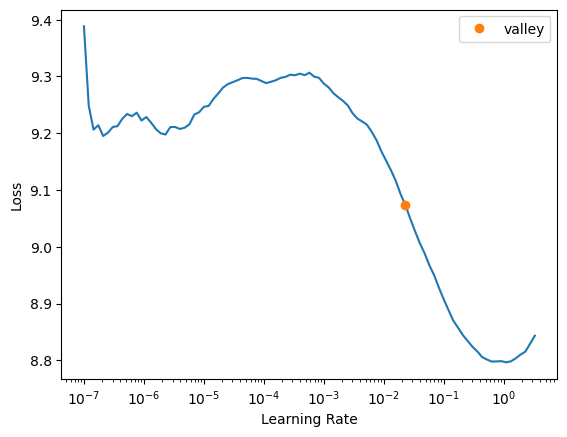

In [ ]:
learn.lr_find()

In [ ]:
# train the learner object
learn.fine_tune(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.813432,6.658162,0.266858,01:15


epoch,train_loss,valid_loss,accuracy,time
0,6.762266,6.574886,0.275257,01:18


KeyboardInterrupt: 

In [ ]:
learn.save_encoder('finetuned')

In [ ]:
blocks=(TextBlock.from_df('content', seq_len=dls.seq_len, vocab=dls.vocab), CategoryBlock())

In [ ]:

dls = DataBlock(blocks=blocks,
                          get_x=ColReader('text'),
                          get_y=ColReader('category'),
                          splitter=RandomSplitter(0.2))

In [ ]:
dls =dls.dataloaders(df_trn, bs=64)

In [ ]:
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxup rais xxmaj john xxmaj magufuli amewaagiza wafanyabiashara kulipa kodi kwa wakati , kutotoa rushwa na kuripoti xxunk rushwa . xxmaj akizungumza na wafanyabiasha xxmaj ikulu jana , xxmaj rais xxmaj magufuli aliwapongeza wafanyabiashara hao kufika katika mkutano huo kwa gharama zao na pia kutoa michango yao kwa lengo la kuboresha huduma za serikali lakini pia mazingira ya biashara.alisema lengo la mkutano huo ilikuwa ni kueleza changamoto mbalimbali zinazosababisha kodi xxunk ipasavyo ambapo alikumbusha kuwa kazi ya xxmaj mamlaka ya xxmaj mapato ( tra ) ni kukusanya kodi . xxmaj aliwashukuru wafanyabiashara hao kwa kusema ukweli na wameeleza kodi inayokusanywa labda asilimia tatu ndio inakwenda serikali na asilimia kubwa inapotea kutokana na rushwa.alisema kodi xxunk kama nchi itaingia katika matatizo makubwa na kuongeza kuwa maendelo yote yanayofanyika ni kutokana na kodi za wananchi . “ vituo vya afya , hospitali vyote vinajengwa kwa kodi za wananchi . xxmaj kuna",Kitaifa
1,"xxbos [ "" tottenham huenda xxunk kiungo wa kati wa xxmaj denmark xxmaj christian xxmaj eriksen , 27 , na mshambuliaji wa xxmaj juventus ' raia wa xxmaj argentina xxmaj paulo xxmaj dybala , 25 , wakati wa dirisha la uhamisho la mwezi xxmaj januari . ( tuttosport , via xxmaj express ) "" , ' kiungo wa kati wa xxmaj manchester xxmaj paul xxmaj pogba , 26 , amekubali malipo ya xxunk wa £ xxunk , xxrep 3 0 kwa wiki na xxmaj paris st - germain kabla ya siku ya mwisho ya dirisha la uhamisho lakini uhamisho huo uligonga mwamba baada ya xxmaj neymar kushindwa kuhamia xxmaj barcelona . ( calciomercato , via xxmaj sun ) ' , "" real xxmaj madrid na xxmaj chelsea wameafikiana makubaliano ya uhamisho wa kiungo n'golo xxmaj kante , 28 , ambapo klabu hiyo xxunk klabu hiyo ya xxmaj uhispania iwapo watapokea",michezo
2,"xxbos xxup wakati xxmaj tanzania ikiweka mikakati mbalimbali ya kuinua soka kwa kutunga sera na kuweka mipango kadha wa kadha , imebainika kuwa viongozi , watalaamu na wachezaji wanahusika kwa kiasi kikubwa katika xxunk maendeleo mchezo huo xxunk la habarileo xxunk kwa kina sakata la hongo kwenye soka ikiwa ni siku chache tangu aliyekuwa xxmaj kiungo wa xxmaj klabu ya xxup kmc inayoshiriki xxmaj ligi xxmaj kuu xxmaj bara , xxmaj abdulhalim xxmaj humud kutoka hadharani na kudai kuwa viongozi klabu za soka nchini wanadai hongo huku wachezaji nao wakitoa xxunk wapate kusajiliwa au kupata nafasi ya kucheza kwenye klabu xxunk huyo wa zamani wa xxmaj simba , xxmaj mtibwa na xxmaj azam xxup fc anabainisha kuwa xxunk hongo katika soka ni viongozi na makocha kutaka kunufaika kupitia mchakato mzima wa usajili unaohusisha mikataba ya xxunk hivyo anaeleza kuwa baadhi ya wachezaji xxunk ndani ya iliyokuwa klabu yake wamekuwa wepesi",michezo


In [ ]:
learn_2 = text_classifier_learner(dls, AWD_LSTM, metrics=[accuracy]).to_fp16()
learn_2.load_encoder('finetuned')

SuggestedLRs(valley=0.04786301031708717)

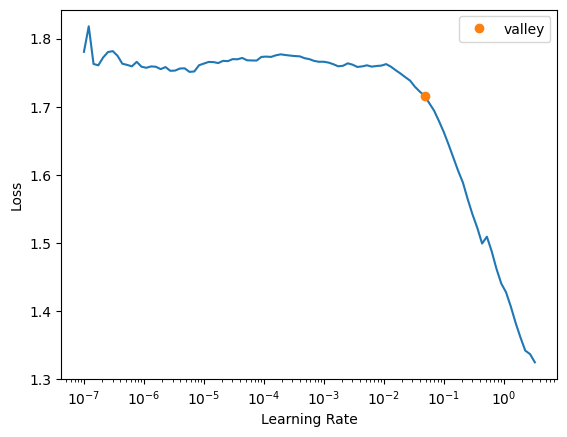

In [ ]:
learn_2.lr_find()


In [ ]:
learn_2.fit_one_cycle(5,5e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.504461,0.305427,0.884882,00:09
1,0.526603,0.311792,0.877947,00:09
2,0.509559,0.301252,0.883495,00:09
3,0.502577,0.292524,0.890430,00:09
4,0.504612,0.293297,0.887656,00:09


In [ ]:
learn_2.freeze_to(-2)
learn_2.fit_one_cycle(5, slice(1e-3/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.488014,0.319271,0.875173,00:10
1,0.480367,0.276842,0.890430,00:10
2,0.424701,0.265596,0.908460,00:10
3,0.367108,0.249356,0.911234,00:10
4,0.330675,0.252874,0.911234,00:11


In [ ]:
learn_2.freeze_to(-3)
learn_2.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.347971,0.276328,0.904300,00:13
1,0.408930,0.239025,0.908460,00:14
2,0.377612,0.227485,0.926491,00:13
3,0.319120,0.217326,0.925104,00:13
4,0.268735,0.226587,0.920943,00:13


In [ ]:
learn_2.unfreeze()
learn_2.fit_one_cycle(5, slice(1e-3/(2.6**4),3e-2))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
tdl = learn_2.dls.test_dl(test['content'])
test_preds_tta, test_labels_tta = learn_2.tta(dl=tdl)

In [ ]:
preds_test = test_preds_tta

In [ ]:
preds_test[0]

tensor([5.7430e-04, 4.8550e-04, 5.5881e-04, 9.9468e-01, 3.6995e-03])

In [ ]:
k = np.unique(train.category).tolist()
import os
submission = ss.copy()
for i, c in enumerate(k):
  submission[c] = preds_test[:,i]
submission = submission[['swahili_id', "Kitaifa"   ,"michezo"   ,"Biashara"   ,"Kimataifa"   ,"Burudani"]] # Get same order as sample sub
submission.head()

,swahili_id,Kitaifa,michezo,Biashara,Kimataifa,Burudani
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,0.994682,0.003699,0.000574,0.000559,0.000485
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,0.008035,0.990510,0.000340,0.000159,0.000956
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,0.405924,0.000416,0.590616,0.002254,0.000790
3,00868eeee349e286303706ef0ffd851f39708d37,0.976108,0.016680,0.000517,0.004452,0.002242
4,00a5cb12d3058dcf2e42f277eee599992db32412,0.733807,0.016339,0.248207,0.000522,0.001125


In [ ]:
class_list = k
class_indexes = np.argmax(preds_test, axis=1)
classes = [class_list[idx] for idx in class_indexes]

In [ ]:
pd.Series(classes).value_counts()

Kitaifa      518
michezo      442
Biashara     320
Kimataifa      8
Name: count, dtype: int64

In [ ]:
train.category.value_counts()

category
Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: count, dtype: int64

In [ ]:
name = "FastAI x Blurr.csv"
submission.to_csv(name, index=False)

In [ ]:
# name = "FastAI x Blurr.csv"
# submission.to_csv(name, index=False)
# from google.colab import files
# files.download(name)